In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv(r"C:\Users\Kavyasree P\Downloads\College_Data.txt",index_col=0)

In [10]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public. We will use a data frame with 777 observations on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university
Apps Number of applications received
Accept Number of applications accepted
Enroll Number of new students enrolled
Top10perc Pct. new students from top 10% of H.S. class
Top25perc Pct. new students from top 25% of H.S. class
F.Undergrad Number of fulltime undergraduates
P.Undergrad Number of parttime undergraduates
Outstate Out-of-state tuition
Room.Board Room and board costs
Books Estimated book costs
Personal Estimated personal spending
PhD Pct. of faculty with Ph.D.’s
Terminal Pct. of faculty with terminal degree
S.F.Ratio Student/faculty ratio
perc.alumni Pct. alumni who donate
Expend Instructional expenditure per student
Grad.Rate Graduation rate

EDA

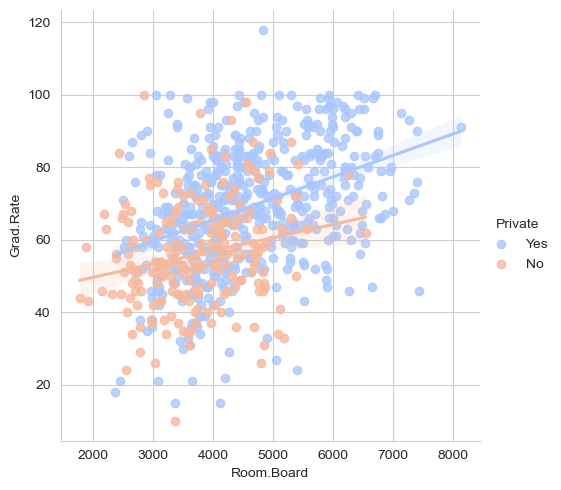

In [17]:
sns.set_style("whitegrid")
sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private',
           palette='coolwarm',aspect=1,fit_reg=True)

The plot shows that these two feature dimensions separate out baed on the type of college

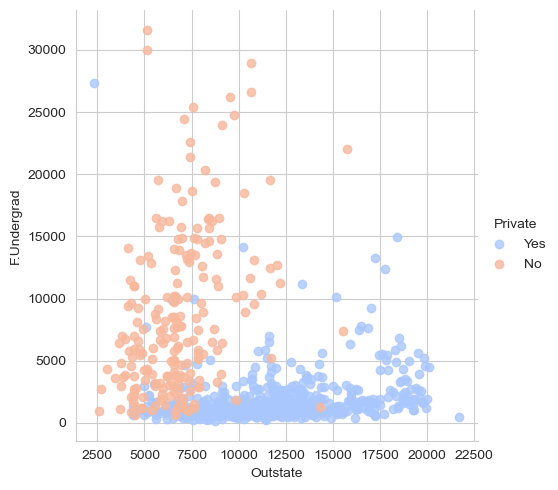

In [20]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate',y='F.Undergrad',data=df, hue='Private',
           palette='coolwarm',aspect=1,fit_reg=False)

<Axes: xlabel='Private', ylabel='S.F.Ratio'>

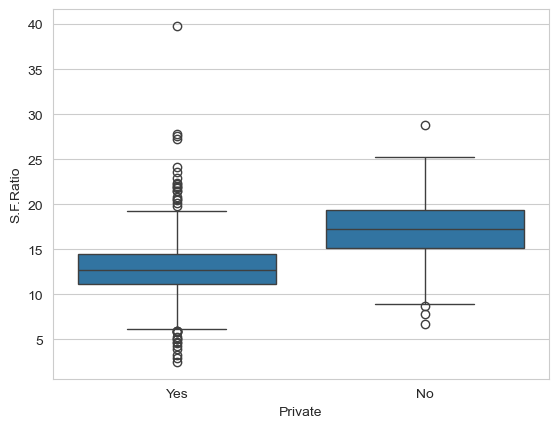

In [21]:

sns.boxplot(x='Private',y='S.F.Ratio',data=df)

** Create a boxplot of student-faculty ratio based on college type**

<Axes: xlabel='Private', ylabel='perc.alumni'>

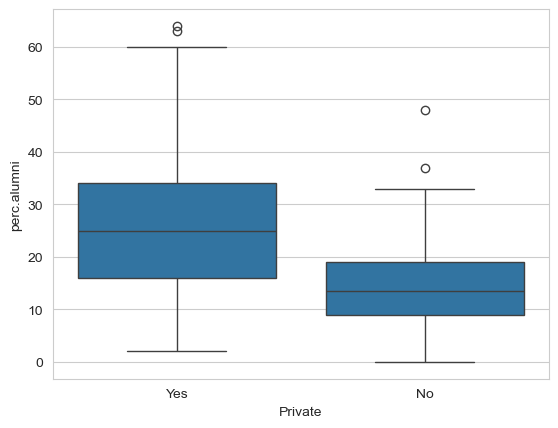

In [22]:

sns.boxplot(x='Private',y='perc.alumni',data=df)

** Create a boxplot of percent of alumni who donate based on college type**

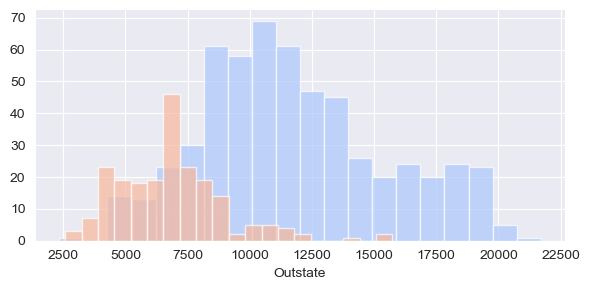

In [24]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

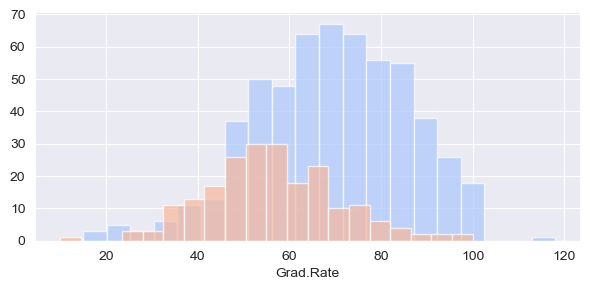

In [26]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

There seems to be a private school with a graduation rate of higher than 100%

In [27]:
df[df['Grad.Rate'] > 100]
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_8228\2878018378.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Grad.Rate']['Cazenovia College'] = 100
C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_8228\2878018378.py:2: SettingW

K Means Cluster Creation

In [28]:
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
kmeans=KMeans(n_clusters=2,verbose=1, tol=1e-3, max_iter=300, n_init=20)

In [38]:
kmeans.fit(df.drop('Private',axis=1))

Initialization complete
Iteration 0, inertia 61617923357.78.
Iteration 1, inertia 50456568324.617355.
Iteration 2, inertia 49859610443.409645.
Iteration 3, inertia 49590677704.125206.
Iteration 4, inertia 49449425557.50472.
Iteration 5, inertia 49383159901.55468.
Iteration 6, inertia 49334126917.025665.
Iteration 7, inertia 49296388860.34234.
Iteration 8, inertia 49288803360.300095.
Iteration 9, inertia 49284495174.157326.
Iteration 10, inertia 49280652371.78182.
Iteration 11, inertia 49279380514.10338.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 55534789411.75999.
Iteration 1, inertia 49045545795.95957.
Iteration 2, inertia 48700060169.803925.
Iteration 3, inertia 48418391574.39324.
Iteration 4, inertia 48373976759.0363.
Iteration 5, inertia 48356200684.31276.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 67766963222.68001.
Iteration 1, inertia 55289485597.86731.
Iteration 2, inertia 530647831

KMeans(n_clusters=2, n_init=20, tol=0.001, verbose=1)

Initialization complete
Iteration 0, inertia 61443356579.42001.
Iteration 1, inertia 49275561009.65548.
Iteration 2, inertia 49266569554.91829.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 56010522325.02999.
Iteration 1, inertia 49395056835.51404.
Iteration 2, inertia 49302803918.049995.
Iteration 3, inertia 49086549158.386536.
Iteration 4, inertia 48828751140.32582.
Iteration 5, inertia 48494697168.25807.
Iteration 6, inertia 48385460206.97989.
Iteration 7, inertia 48357231548.41005.
Iteration 8, inertia 48356200817.142685.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 61913598532.67.
Iteration 1, inertia 55565665477.868126.
Iteration 2, inertia 55194017353.01528.
Iteration 3, inertia 54874599198.463646.
Iteration 4, inertia 54474769669.16577.
Iteration 5, inertia 54224759091.81951.
Iteration 6, inertia 54111721201.85116.
Iteration 7, inertia 53998572764.43448.
Iteration 8, inertia 53946111866.3

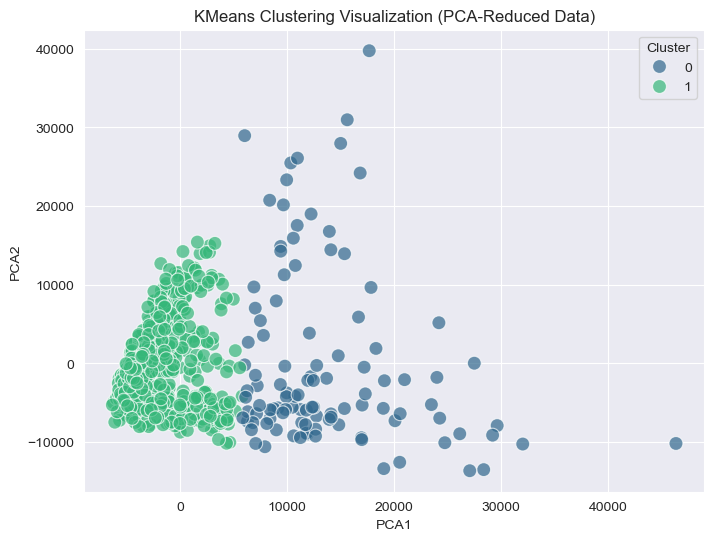

In [46]:
from sklearn.decomposition import PCA
X = df.drop('Private', axis=1)
kmeans.fit(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA-reduced data and the cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering Visualization (PCA-Reduced Data)')
plt.show()

In [39]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [40]:
df_desc=pd.DataFrame(df.describe())
feat = list(df_desc.columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
kmclus

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,10363.138889,6550.898148,2569.722222,41.490741,70.203704,13061.935185,2464.861111,10719.175926,4643.472222,595.212963,1714.203704,86.398148,91.333333,14.027778,20.074074,14170.500000,67.592593
1,1813.234679,1287.165919,491.044843,25.309417,53.470852,2188.548580,595.458894,10395.708520,4311.364723,541.982063,1280.336323,70.442451,77.825112,14.099701,23.174888,8932.046338,65.092676


In [41]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Evaluation
There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [42]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [43]:
df1=df # Create a copy of data frame so that original data frame does not get 'corrupted' with the cluster index
df1['Cluster'] = df['Private'].apply(converter)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

